In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [44]:
def load_data(data_path):
    df = pd.read_csv('data/PatientInfo.csv')
    df['released_date'] = pd.to_datetime(df['released_date'])
    df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], errors='coerce')
    df['symptom_onset_date'] = pd.to_datetime(df['symptom_onset_date'], errors='coerce')
    df['month'] = df['confirmed_date'].dt.month
    df['day'] = df['confirmed_date'].dt.day
    df['age_median'] = pd.to_numeric(df['age'].str.extract('(\d+)', expand=False))
    df['age_median'] = df['age_median'].astype('Int64') + 5
    df['contact_number'] = pd.to_numeric(df['contact_number'].str.extract('(\d+)', expand=False))
    df['contact_number'] = pd.to_numeric(df['contact_number'])
    df['patient_id'] = df['patient_id'].astype(str)
    df['infected_by'] = df['infected_by'].astype(str)
    return df
df_south_korea = load_data('')
df_south_korea.isnull().sum()
df_south_korea.head(5)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,month,day,age_median
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,nan,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released,1.0,23.0,55
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,nan,31.0,NaT,2020-01-30,2020-03-02,NaN,released,1.0,30.0,35
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17.0,NaT,2020-01-30,2020-02-19,NaN,released,1.0,30.0,55
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,nan,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released,1.0,30.0,25
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2.0,NaT,2020-01-31,2020-02-24,NaN,released,1.0,31.0,25


In [27]:
df_south_korea.dtypes

patient_id                     int64
sex                           object
age                           object
country                       object
province                      object
city                          object
infection_case                object
infected_by                   object
contact_number                object
symptom_onset_date    datetime64[ns]
confirmed_date        datetime64[ns]
released_date         datetime64[ns]
deceased_date                 object
state                         object
month                        float64
day                          float64
age_median                     Int64
dtype: object

In [4]:
def simulate_age(ranges, percents, total_pop):
    simulated_pop = np.array(0)
    for (low, high), percent in zip(ranges, percents):
        simulated_pop = np.append(simulated_pop, 
                  np.random.randint(low=low, high=high, size=int(total_pop*percent/100)))
    return simulated_pop

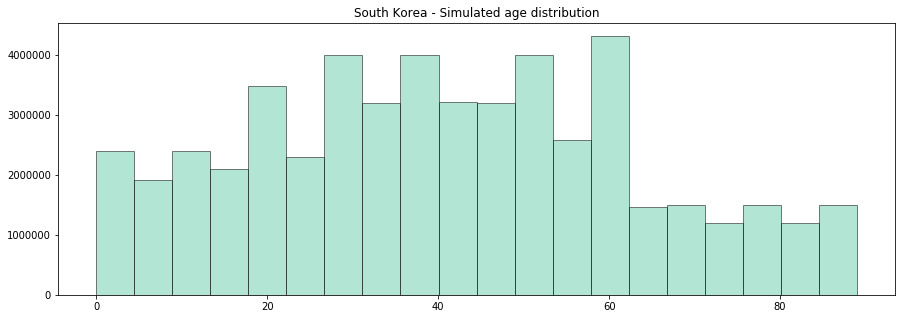

In [5]:
ranges = [(0,14),(15,24),(25,54),(55,64),(65,90)]
percents = [18.48,11.8,37.48,12.42,19.82]
south_korea_population = 51418097
'''
0-14 years: 13.03% 
15-24 years: 12.19%
25-54 years: 45.13%
55-64 years: 15.09% 
65 years and over: 14.55% 
'''
percents = [13.03,12.19,45.13,15.09,14.55]
south_korea_simulated_pop = simulate_age(ranges, percents, south_korea_population)
f, (ax1) = plt.subplots(1, figsize=(15,5))
ranges = [(0,14),(15,24),(25,54),(55,64),(65,90)]
percents = [18.48,11.8,37.48,12.42,19.82]
ax1.hist(south_korea_simulated_pop,bins=20, color='mediumaquamarine', edgecolor='k', alpha=0.5)
ax1.set_title('South Korea - Simulated age distribution')
plt.show()

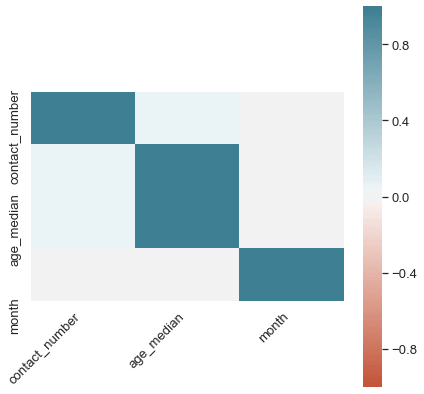

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

corr = df_south_korea[['patient_id', 'contact_number', 'age_median', 'month']].corr(method ='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);